# Modeling and Simulation in Python

Chapter 8

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [6]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Functions from the previous chapter

In [7]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [8]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end-1):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [9]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

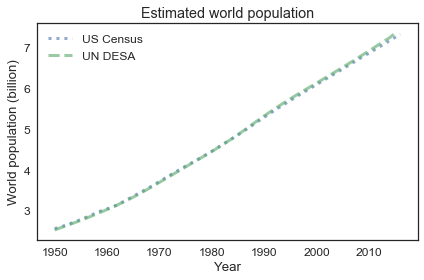

In [10]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [11]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [12]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

Initialize the system object.

In [13]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Run the model and plot results.

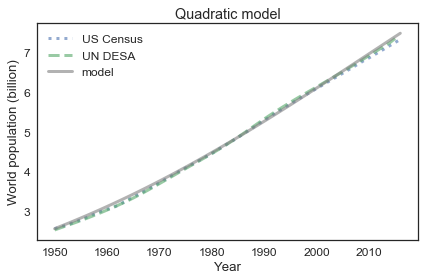

In [14]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

Saving figure to file chap08-fig03.pdf


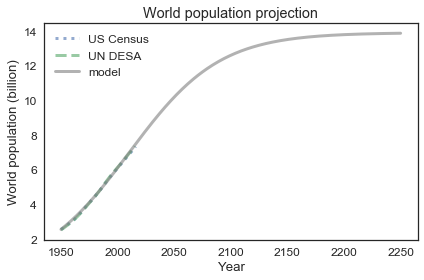

In [15]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('chap08-fig03.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [16]:
results[system.t_end]

13.856665141368708

In [17]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

In [18]:
def plot_6_results(census, un, timeseries1,timeseries2,timeseries3,timeseries4,timeseries5,timeseries6, title):
    """Plot the estimates and the 6 models.
    
    This is very clumsy, but I spent way too much time trying to get an array based function to work.
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries1, color='gray', label='model (1 b)')
    plot(timeseries2, color='black', label='model (5 b)')
    plot(timeseries3, color='red', label='model (9 b)')
    plot(timeseries4, color='blue', label='model (13 b)')
    plot(timeseries5, color='green', label='model (17 b)')
    plot(timeseries6, color='yellow', label='model (20 b)')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

Saving figure to file chap08-figEx01b.pdf


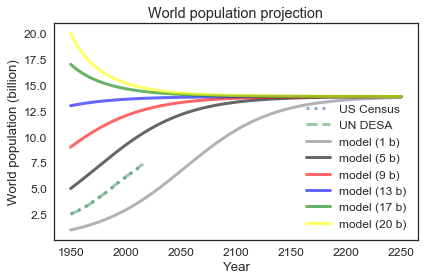

In [19]:
system.t_end = 2250

system.p_0=1
results1=TimeSeries()
results1 = run_simulation(system, update_func_quad)
system.p_0=5
results2=TimeSeries()
results2 = run_simulation(system, update_func_quad)
system.p_0=9
results3=TimeSeries()
results3 = run_simulation(system, update_func_quad)
system.p_0=13
results4=TimeSeries()
results4 = run_simulation(system, update_func_quad)
system.p_0=17
results5=TimeSeries()
results5 = run_simulation(system, update_func_quad)
system.p_0=20
results6=TimeSeries()
results6 = run_simulation(system, update_func_quad)

plot_6_results(census, un, results1,results2,results3,results4,results5,results6, 'World population projection')
savefig('chap08-figEx01b.pdf')

### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [20]:
table3 = tables[3]
table3.head()

,United States Census Bureau (2015)[28],Population Reference Bureau (1973-2015)[15],United Nations Department of Economic and Social Affairs (2015)[16]
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

In [21]:
table3.columns = ['census', 'prb', 'un']

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [22]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), 'b:', label='US Census')
    plot(un_proj.dropna(), 'g--', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [23]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2100.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Saving figure to file chap04-fig02.pdf


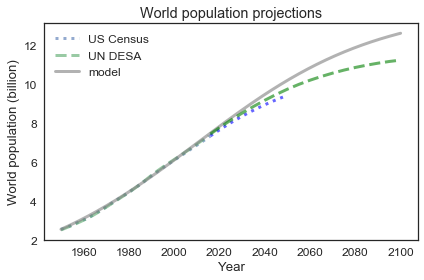

In [24]:
results = run_simulation(system, update_func_quad)

plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap04-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

## Exercises

**Optional exercise:** The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate projections, by extrapolating observed changes in growth rate.

The `modsim` library provides a function, `compute_rel_diff`, that computes relative differences of the elements in a sequence.  It is a wrapper for the NumPy function `ediff1d`:

In [25]:
source_code(compute_rel_diff)

def compute_rel_diff(seq):
    xs = np.asarray(seq)
    diff = np.ediff1d(xs, np.nan)
    return diff / seq



Here's how we can use it to compute the relative differences in the `census` and `un` estimates:

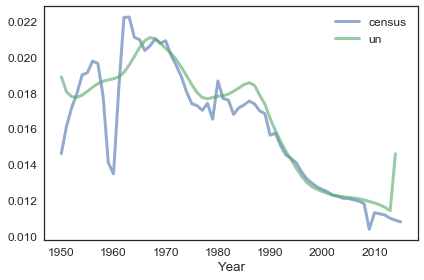

In [26]:
alpha_census = compute_rel_diff(census)
plot(alpha_census)

alpha_un = compute_rel_diff(un)
plot(alpha_un)

decorate(xlabel='Year', label='Net growth rate')

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1965.  As an exercise, you can use this data to make a projection of world population until 2100.

1. Define a function, `alpha_func`, that takes `t` as a parameter and returns an estimate of the net growth rate at time `t`, based on a linear function `alpha = intercept + slope * t`.  Choose values of `slope` and `intercept` to fit the observed net growth rates since 1965.

2. Call your function with a range of `ts` from 1960 to 2020 and plot the results.

3. Create a `System` object that includes `alpha_func` as a system variable.

4. Define an update function that uses `alpha_func` to compute the net growth rate at the given time `t`.

5. Test your update function with `t_0 = 1960` and `p_0 = census[t_0]`.

6. Run a simulation from 1960 to 2100 with your update function, and plot the results.

7. Compare your projections with those from the US Census and UN.

In [47]:
# start by deducing reasonable values for slope and intercept
# I'll paste alpha_un data between 1965 and 2014 into Excel to get a linear fit
# I ignore 2014 data point because it is way off line. Y=-2.24e-4+4.61e-1X, R2=0.936
for i in range(50):
    print (i+1965, alpha_un[i+1965])

1965 0.02053176728437212
1966 0.020911551029763803
1967 0.02109058925415572
1968 0.02101656992547482
1969 0.020758188486659338
1970 0.02047634637090081
1971 0.02020818429559682
1972 0.01985720289669974
1973 0.01942307949759347
1974 0.018951122249287078
1975 0.018451250053342288
1976 0.018012165954475304
1977 0.017733081691009327
1978 0.017660373676849746
1979 0.017733142573392077
1980 0.01779837434815221
1981 0.017827650403505917
1982 0.01792104480553395
1983 0.018082043263461734
1984 0.018258274003086366
1985 0.018458583147941614
1986 0.018560906303449712
1987 0.01841288422276466
1988 0.01786326916513628
1989 0.017364563479923413
1990 0.01655611582078212
1991 0.01589800279277194
1992 0.015280632144474183
1993 0.014737986202132534
1994 0.0142615853328304
1995 0.01379254395511941
1996 0.013343302439389169
1997 0.012988535013695223
1998 0.01274819781096187
1999 0.012595669665169867
2000 0.012475576914740197
2001 0.012363793230324945
2002 0.012281440429518646
2003 0.012223017749625578
200

In [103]:
# Define a function, alpha_func, that takes t as a parameter and returns an estimate of the net growth rate at time t, 
#based on a linear function alpha = intercept + slope * t. Choose values of slope and intercept to fit the observed 
#net growth rates since 1965.
def alpha_func(t):
    slope=-2.253e-4
    intercept=0.464
    alpha=intercept+slope*t
    return alpha

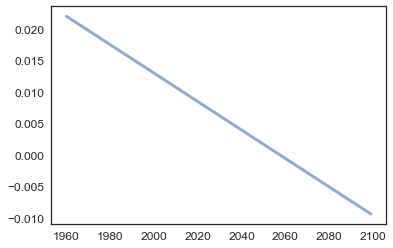

In [98]:
# Call your function with a range of ts from 1960 to 2020 and plot the results.
alpha=TimeSeries()
for t in linrange(system.t_0,system.t_end-1):
    alpha[t]=alpha_func(t)
plot (alpha)

In [99]:
# Create a System object that includes alpha_func as a system variable.
system = System(t_0=1960, 
                t_end=2100,
                p_0=census[1960],
                beta=-0.0018,
                alpha_func=alpha_func)

,values
t_0,1960
t_end,2100
p_0,3.043
beta,-0.0018
alpha_func,<function alpha_func at 0x000000000E659E18>


In [100]:
# Define an update function that uses alpha_func to compute the net growth rate at the given time t.
def update_func_alpha(t,pop,system):
        
    growth = pop*alpha_func(t)
    return growth

In [101]:
# Test your update function with t_0 = 1960 and p_0 = census[t_0].

system.t_0=1960
system.p_0=census[1960]
growth=system.p_0*update_func_alpha(system.t_0,system.p_0,system)
print(growth,system.p_0,system.t_0)

0.2039020770727397 3.043001508 1960


In [102]:
def run_simulation_alpha(system, update_func_alpha):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end-1):
        results[t+1] = results[t]+update_func_alpha(t,results[t],system)
        
    return results

Saving figure to file chap08-figEx02.pdf


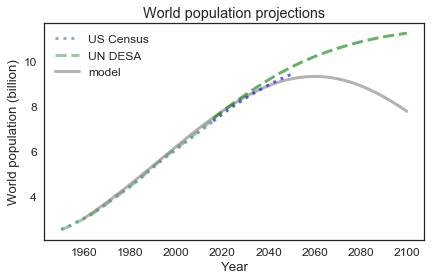

In [104]:
# Run a simulation from 1960 to 2100 with your update function, and plot the results.
# Compare your projections with those from the US Census and UN.
system.t_0=1960
system.t_end=2100
results = run_simulation_alpha(system, update_func_alpha)

plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap08-figEx02.pdf')

Compare your projections with those from the US Census and UN.
    Not a good fit after 2050. 